In [1]:
%load_ext autoreload
%autoreload 2

from src.base_classes.omic_data_loader import OmicDataLoader
from src.data_managers.concat import CatOmicDataManager

In [2]:
mrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/mrna",
)
mirna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/mirna_genes",
)
circrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/circrna",
)
# pirna_loader = OmicDataLoader(
#     data_dir="mds_data/splits_74/pirna",
# )
te_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/te_counts",
)

In [3]:
omic_data_loaders = {
    "mrna": mrna_loader,
    "mirna": mirna_loader,
    "circrna": circrna_loader,
    # # "pirna": pirna_loader,
    # "te": te_loader,
}
odm = CatOmicDataManager(omic_data_loaders, n_splits=5)

save_folder = f"logs/mds_disease/{'_'.join(omic_data_loaders.keys())}.csv"
save_folder

'logs/mds_disease/mrna_mirna_circrna.csv'

In [22]:
from src.evals.knn import KNNEvaluator

knn_eval = KNNEvaluator(
    data_manager=odm,
    n_trials=20,
    verbose=True,
    params={"k_lb": 1, "k_ub": 20},
)
_ = knn_eval.evaluate()
knn_eval.print_best_results()
# knn_eval.save_results(results_file=save_folder, row_name="KNN")

[I 2024-11-19 18:43:55,725] A new study created in memory with name: no-name-9141beaf-16de-49e1-a711-4d69ef328e6d
[I 2024-11-19 18:43:55,894] Trial 0 finished with value: 0.6752702676178449 and parameters: {'n_neighbors': 5}. Best is trial 0 with value: 0.6752702676178449.
[I 2024-11-19 18:43:56,036] Trial 1 finished with value: 0.6305302169311957 and parameters: {'n_neighbors': 12}. Best is trial 0 with value: 0.6752702676178449.


New best score: 0.675
Best model performance:
Accuracy: 0.905 ± 0.035
F1 Macro: 0.828 ± 0.068
F1 Weighted: 0.902 ± 0.039


[I 2024-11-19 18:43:56,207] Trial 2 finished with value: 0.6305302169311957 and parameters: {'n_neighbors': 14}. Best is trial 0 with value: 0.6752702676178449.
[I 2024-11-19 18:43:56,351] Trial 3 finished with value: 0.6752702676178449 and parameters: {'n_neighbors': 5}. Best is trial 0 with value: 0.6752702676178449.
[I 2024-11-19 18:43:56,514] Trial 4 finished with value: 0.669993140387569 and parameters: {'n_neighbors': 13}. Best is trial 0 with value: 0.6752702676178449.
[I 2024-11-19 18:43:56,657] Trial 5 finished with value: 0.5814461133586074 and parameters: {'n_neighbors': 17}. Best is trial 0 with value: 0.6752702676178449.
[I 2024-11-19 18:43:56,801] Trial 6 finished with value: 0.6136105816633716 and parameters: {'n_neighbors': 6}. Best is trial 0 with value: 0.6752702676178449.
[I 2024-11-19 18:43:56,948] Trial 7 finished with value: 0.5814461133586074 and parameters: {'n_neighbors': 18}. Best is trial 0 with value: 0.6752702676178449.
[I 2024-11-19 18:43:57,126] Trial 8 f

Best model performance:
Accuracy: 0.905 ± 0.035
F1 Macro: 0.828 ± 0.068
F1 Weighted: 0.902 ± 0.039


In [249]:
# from src.evals.svm import SVMEvaluator

# svm_eval = SVMEvaluator(
#     data_manager=odm,
#     n_trials=50,
#     verbose=True,
#     params={
#         "C_lb": 0.01,
#         "C_ub": 10,
#         "no_rfe": True,
#         # "rfe_step_range": (0.05, 0.2),
#         # "rfe_n_features_range": (100, 200),
#     },
#     mode="linear",
# )
# _ = svm_eval.evaluate()
# svm_eval.save_results(results_file=save_folder, row_name="Linear SVM")

In [51]:
from src.evals.xgboost import XGBoostEvaluator

xgb_eval = XGBoostEvaluator(
    data_manager=odm,
    n_trials=60,
    verbose=True,
)
_ = xgb_eval.evaluate()
xgb_eval.print_best_results()
xgb_eval.print_best_parameters()
# xgb_eval.save_results(results_file=save_folder, row_name="XGBoost")

[I 2024-11-19 19:39:32,749] A new study created in memory with name: no-name-cf2f92c3-4c56-4956-b704-1792ceb171b3
[I 2024-11-19 19:39:32,953] Trial 0 finished with value: 0.7581635155117249 and parameters: {'lambda': 0.043204983422868944, 'alpha': 2.0039697040165467e-08}. Best is trial 0 with value: 0.7581635155117249.


New best score: 0.758
Best model performance:
Accuracy: 0.933 ± 0.060
F1 Macro: 0.877 ± 0.114
F1 Weighted: 0.927 ± 0.067
[{'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7115384615384616), 'f1_weighted': np.float64(0.8384615384615385)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7916666666666666), 'f1_weighted': np.float64(0.8666666666666667)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}]


[I 2024-11-19 19:39:33,179] Trial 1 finished with value: 0.7581635155117249 and parameters: {'lambda': 0.013979756496849195, 'alpha': 1.0131198610488745e-08}. Best is trial 0 with value: 0.7581635155117249.
[I 2024-11-19 19:39:33,432] Trial 2 finished with value: 0.775476069168414 and parameters: {'lambda': 9.316595861282712e-05, 'alpha': 1.9005528868127347e-08}. Best is trial 2 with value: 0.775476069168414.


New best score: 0.775
Best model performance:
Accuracy: 0.932 ± 0.042
F1 Macro: 0.891 ± 0.067
F1 Weighted: 0.933 ± 0.042
[{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.9068322981366459), 'f1_weighted': np.float64(0.9366459627329193)}, {'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7916666666666666), 'f1_weighted': np.float64(0.8666666666666667)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 0.9285714285714286, 'f1_macro': np.float64(0.8782608695652174), 'f1_weighted': np.float64(0.9341614906832298)}]


[I 2024-11-19 19:39:33,654] Trial 3 finished with value: 0.7581635155117249 and parameters: {'lambda': 0.024821871449689246, 'alpha': 3.10498525360208e-08}. Best is trial 2 with value: 0.775476069168414.
[I 2024-11-19 19:39:33,995] Trial 4 finished with value: 0.49172948755219825 and parameters: {'lambda': 1.1194376466046186e-05, 'alpha': 0.07435541657497856}. Best is trial 2 with value: 0.775476069168414.
[I 2024-11-19 19:39:34,208] Trial 5 finished with value: 0.43192671408544425 and parameters: {'lambda': 0.0017186560420617736, 'alpha': 0.1101305829986984}. Best is trial 2 with value: 0.775476069168414.
[I 2024-11-19 19:39:34,442] Trial 6 finished with value: 0.6175280622053535 and parameters: {'lambda': 2.039005895831444e-06, 'alpha': 0.013202869275924196}. Best is trial 2 with value: 0.775476069168414.
[I 2024-11-19 19:39:34,650] Trial 7 finished with value: 0.6631836987350632 and parameters: {'lambda': 0.00046041436616314394, 'alpha': 6.468407042888217e-05}. Best is trial 2 with 

New best score: 0.814
Best model performance:
Accuracy: 0.947 ± 0.050
F1 Macro: 0.910 ± 0.080
F1 Weighted: 0.945 ± 0.051
[{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7916666666666666), 'f1_weighted': np.float64(0.8666666666666667)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}]


[I 2024-11-19 19:39:42,354] Trial 38 finished with value: 0.7581635155117249 and parameters: {'lambda': 0.03938311744782428, 'alpha': 4.967635256567675e-07}. Best is trial 37 with value: 0.8139820349629631.
[I 2024-11-19 19:39:42,649] Trial 39 finished with value: 0.7581635155117249 and parameters: {'lambda': 0.008272924281438186, 'alpha': 1.0624435983084024e-08}. Best is trial 37 with value: 0.8139820349629631.
[I 2024-11-19 19:39:42,873] Trial 40 finished with value: 0.7581635155117249 and parameters: {'lambda': 0.08276153604215596, 'alpha': 3.497158115139938e-08}. Best is trial 37 with value: 0.8139820349629631.
[I 2024-11-19 19:39:43,114] Trial 41 finished with value: 0.8139820349629631 and parameters: {'lambda': 0.0008167900187103956, 'alpha': 1.4571238955696777e-06}. Best is trial 37 with value: 0.8139820349629631.
[I 2024-11-19 19:39:43,384] Trial 42 finished with value: 0.6631836987350632 and parameters: {'lambda': 0.0029091199862247377, 'alpha': 0.00010164694497652317}. Best i

Best model performance:
Accuracy: 0.947 ± 0.050
F1 Macro: 0.910 ± 0.080
F1 Weighted: 0.945 ± 0.051
Best hyperparameters:
{'lambda': 0.0031526479187211007, 'alpha': 8.39903583254046e-07}


In [62]:
# params = {
#     "verbosity": 1,
#     "objective": "multi:softmax",
#     "eval_metric": "mlogloss",
#     # "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
#     # "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
#     "num_class": xgb_eval.n_classes,
# }

params = {'booster': 'gblinear', 'lambda': 0.00275843484832017, 'alpha': 9.065775976332792e-07}
# params.update(xgb_eval.best_params)
print("params", params)

feat_importances = xgb_eval.get_feature_importances(params)

params {'booster': 'gblinear', 'lambda': 0.00275843484832017, 'alpha': 9.065775976332792e-07}
{'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7115384615384616), 'f1_weighted': np.float64(0.8384615384615385)}
{'ENSG00000181826': [0.06174074113368988, -0.06358759105205536], 'ENSG00000278588': [0.05657241493463516, -0.05205885320901871], 'ENSG00000120594': [0.035003412514925, -0.03298454359173775], 'ENSG00000121797': [-0.05199485272169113, 0.04405664652585983], 'ENSG00000140398': [0.054658204317092896, -0.05511204153299332], 'ENSG00000168062': [-0.06009744107723236, 0.05354907363653183], 'ENSG00000174307': [-0.06833479553461075, 0.06230349466204643], 'ENSG00000184897': [0.039273351430892944, -0.03643811494112015], 'ENSG00000105497': [-0.048355333507061005, 0.045558374375104904], 'ENSG00000113552': [-0.052741922438144684, 0.04690936207771301], 'ENSG00000188536': [-0.04668480530381203, 0.05117340758442879], 'ENSG00000181004': [-0.03865937143564224, 0.034672822803258896], 'ENSG000001435

In [65]:
odm.get_split(0)

(shape: (59, 600)
 ┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
 │ ENSG00000 ┆ ENSG00000 ┆ ENSG00000 ┆ ENSG00000 ┆ … ┆ hsa_circ_ ┆ hsa_circ_ ┆ unknown_i ┆ unknown_ │
 │ 181826    ┆ 278588    ┆ 120594    ┆ 121797    ┆   ┆ 0003154   ┆ 0005925   ┆ d_13      ┆ id_35    │
 │ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
 │ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64      │
 ╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
 │ 0.190054  ┆ 0.8589    ┆ 0.724728  ┆ 0.796341  ┆ … ┆ 0.982376  ┆ 0.749761  ┆ 0.90622   ┆ 0.878276 │
 │ 0.131677  ┆ 0.788182  ┆ 0.73847   ┆ 0.566229  ┆ … ┆ 1.0       ┆ 0.773541  ┆ 0.780771  ┆ 0.808924 │
 │ 0.94058   ┆ 0.623225  ┆ 0.735662  ┆ 0.41357   ┆ … ┆ 0.0       ┆ 0.84555   ┆ 0.873519  ┆ 0.846584 │
 │ 0.805491  ┆ 0.642498  ┆ 0.62087   ┆ 0.43411   ┆ … ┆ 0.871459 

In [63]:
fi_sorted = dict(sorted(feat_importances.items(), key=lambda x: abs(x[1]), reverse=True))

In [64]:
fi_sorted

{'hsa_circ_0000489': 1.0094492100179195,
 'hsa_circ_0005325': 0.7781659830361605,
 'ENSG00000181826': 0.7194908298552036,
 'ENSG00000221771': 0.6953874081373215,
 'ENSG00000174307': 0.6493469141423702,
 'ENSG00000105497': 0.6117222458124161,
 'ENSG00000068976': 0.6011980436742306,
 'ENSG00000140398': 0.5874111093580723,
 'ENSG00000026103': 0.5848362259566784,
 'ENSG00000168062': 0.5829747393727303,
 'ENSG00000184588': 0.5693066343665123,
 'ENSG00000121797': 0.5659318137913942,
 'hsa_circ_0006109': 0.5642539754044265,
 'ENSG00000158578': 0.5632876716554165,
 'ENSG00000128322': 0.5593563057482243,
 'ENSG00000084764': 0.5519135408103466,
 'ENSG00000206172': 0.5446140766143799,
 'ENSG00000196230': 0.5409847814589739,
 'hsa_circ_0020028': 0.536496601998806,
 'ENSG00000198805': 0.5213271453976631,
 'hsa_circ_0007234': 0.5212059621699154,
 'hsa_circ_0000443': 0.5202096980065107,
 'ENSG00000188536': 0.5162173714488745,
 'ENSG00000184897': 0.5133629627525806,
 'hsa_circ_0021712': 0.508204517886

In [ ]:
import polars as pl

mrna = pl.read_csv("mds_data/preprocessed_74/mrna.csv")
mirna = pl.read_csv("mds_data/preprocessed_74/mirna_genes.csv")

mrna_gene = mrna.select("GENE_NAME", "GENE_ID")
mirna_gene = mirna.select("GENE_NAME", "GENE_ID")

# create one big dict to go from id to name
mrna_dict = dict(zip(mrna_gene["GENE_ID"], mrna_gene["GENE_NAME"]))
mirna_dict = dict(zip(mirna_gene["GENE_ID"], mirna_gene["GENE_NAME"]))

# merge the dicts
mrna_dict.update(mirna_dict)

mrna_dict

{'ENSG00000103184': 'SEC14L5',
 'ENSG00000119862': 'LGALSL',
 'ENSG00000115461': 'IGFBP5',
 'ENSG00000173083': 'HPSE',
 'ENSG00000275896': 'PRSS2',
 'ENSG00000137801': 'THBS1',
 'ENSG00000101162': 'TUBB1',
 'ENSG00000072952': 'MRVI1',
 'ENSG00000163736': 'PPBP',
 'ENSG00000150637': 'CD226',
 'ENSG00000154027': 'AK5',
 'ENSG00000187498': 'COL4A1',
 'ENSG00000134871': 'COL4A2',
 'ENSG00000124772': 'CPNE5',
 'ENSG00000103888': 'CEMIP',
 'ENSG00000173269': 'MMRN2',
 'ENSG00000183813': 'CCR4',
 'ENSG00000257335': 'MGAM',
 'ENSG00000161911': 'TREML1',
 'ENSG00000259207': 'ITGB3',
 'ENSG00000262655': 'SPON1',
 'ENSG00000160145': 'KALRN',
 'ENSG00000106366': 'SERPINE1',
 'ENSG00000088053': 'GP6',
 'ENSG00000204424': 'LY6G6F',
 'ENSG00000112936': 'C7',
 'ENSG00000254709': 'IGLL5',
 'ENSG00000086548': 'CEACAM6',
 'ENSG00000213658': 'LAT',
 'ENSG00000128052': 'KDR',
 'ENSG00000137460': 'FHDC1',
 'ENSG00000196526': 'AFAP1',
 'ENSG00000136011': 'STAB2',
 'ENSG00000236320': 'SLFN14',
 'ENSG000001106

- [RELT family in cancer RELL1](https://pmc.ncbi.nlm.nih.gov/articles/PMC10603948/)
- [PHLDA3 in hematopoesis](https://pmc.ncbi.nlm.nih.gov/articles/PMC6218282/)

In [69]:
# rename the keys from fi_sorted to the name of the gene if it exists in mrna_dict
fi_nn = {mrna_dict.get(k, k): v for k, v in fi_sorted.items()}
fi_nn

{'hsa_circ_0000489': 1.0094492100179195,
 'hsa_circ_0005325': 0.7781659830361605,
 'RELL1': 0.7194908298552036,
 'MIR1205': 0.6953874081373215,
 'PHLDA3': 0.6493469141423702,
 'ZNF175': 0.6117222458124161,
 'PYGM': 0.6011980436742306,
 'NEIL1': 0.5874111093580723,
 'FAS': 0.5848362259566784,
 'BATF2': 0.5829747393727303,
 'PDE4B': 0.5693066343665123,
 'CCRL2': 0.5659318137913942,
 'hsa_circ_0006109': 0.5642539754044265,
 'ALAS2': 0.5632876716554165,
 'IGLL1': 0.5593563057482243,
 'MAPRE3': 0.5519135408103466,
 'HBA1': 0.5446140766143799,
 'TUBB': 0.5409847814589739,
 'hsa_circ_0020028': 0.536496601998806,
 'PNP': 0.5213271453976631,
 'hsa_circ_0007234': 0.5212059621699154,
 'hsa_circ_0000443': 0.5202096980065107,
 'HBA2': 0.5162173714488745,
 'H1FX': 0.5133629627525806,
 'hsa_circ_0021712': 0.5082045178860426,
 'EFNA3': 0.48444578191265464,
 'TAS2R3': 0.4668257459998131,
 'PIM1': 0.4664778299629688,
 'PLXDC2': 0.46634650602936745,
 'hsa_circ_0000061': 0.465551421046257,
 'FLVCR2': 0.46

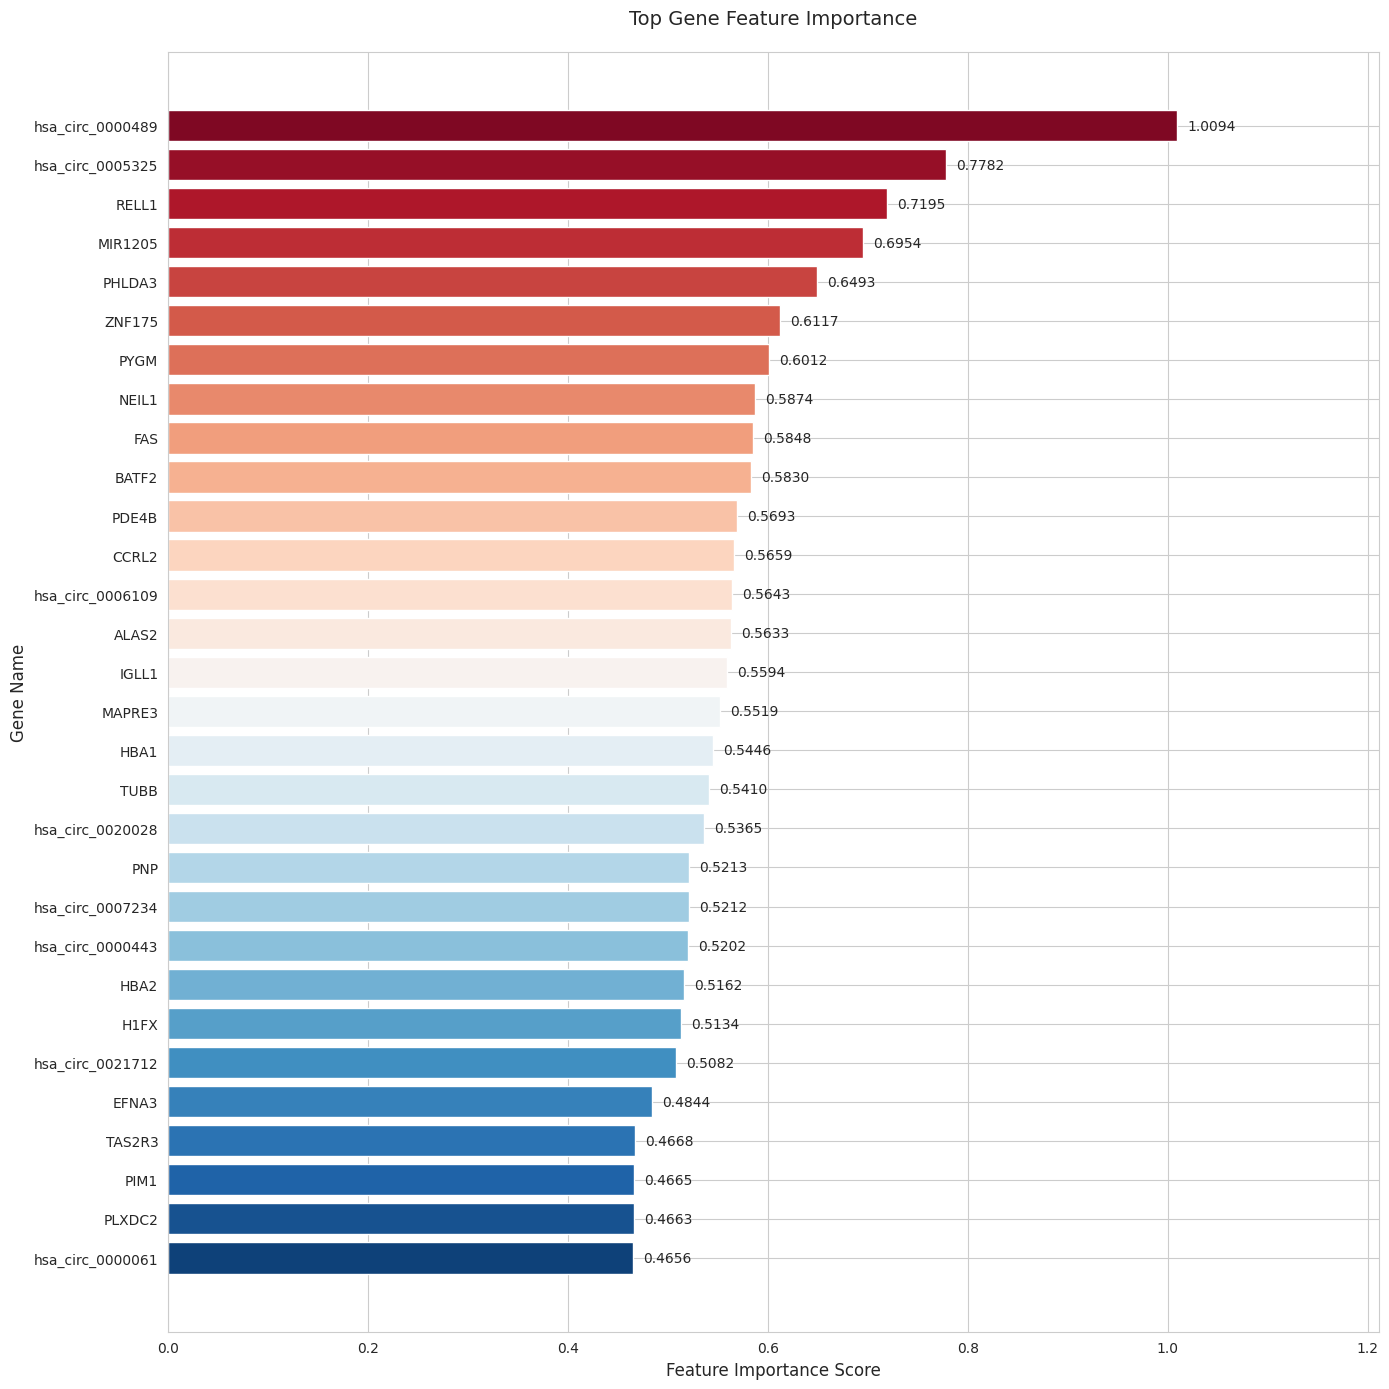

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_genes(importance_dict: dict, n_genes=10, title=None):
    """
    Create a horizontal bar plot of the most important genes directly from a dictionary.
    
    Parameters:
    importance_dict (dict): Dictionary with gene names as keys and importance scores as values
    n_genes (int): Number of top genes to display
    title (str, optional): Title for saving the plot
    """
    # Sort genes by absolute importance and get top n_genes
    sorted_genes = sorted(importance_dict.items(), 
                         key=lambda x: abs(x[1]), 
                         reverse=True)[:n_genes]
    
    # Sort by actual importance value for plotting
    sorted_genes = sorted(sorted_genes, key=lambda x: x[1])
    
    # Separate gene names and importance values
    gene_names = [gene for gene, _ in sorted_genes]
    importance_values = [value for _, value in sorted_genes]
    
    # Calculate figure height based on number of genes (0.4 inches per gene + padding)
    fig_height = max(8, n_genes * 0.4 + 2)
    
    # Set up the plot style with adjusted figure size
    plt.figure(figsize=(14, fig_height))
    sns.set_style("whitegrid")
    
    # Create the bar plot
    ax = plt.gca()
    bars = ax.barh(range(len(gene_names)), 
                   importance_values,
                   color=sns.color_palette("RdBu_r", n_colors=len(gene_names)))
    
    # Set y-axis labels (gene names)
    ax.set_yticks(range(len(gene_names)))
    ax.set_yticklabels(gene_names)
    
    # Customize the plot
    plt.title('Top Gene Feature Importance', pad=20, size=14)
    plt.xlabel('Feature Importance Score', size=12)
    plt.ylabel('Gene Name', size=12)
    
    # Add value labels on the bars with adjusted spacing
    max_val = max(abs(min(importance_values)), abs(max(importance_values)))
    offset = max_val * 0.01  # Dynamic offset based on data range
    
    for i, value in enumerate(importance_values):
        ax.text(value + (offset if value >= 0 else -offset),
                i,
                f'{value:.4f}',
                va='center',
                ha='left' if value >= 0 else 'right',
                fontsize=10)
    
    # Adjust layout and margins
    plt.margins(x=0.2)  # Add 20% padding on x-axis
    plt.tight_layout()
    
    # save plot
    if title:
        plt.savefig(title)
    
    return plt.gcf()

_ = plot_top_genes(fi_nn, n_genes=30, title="Top Genes")

In [ ]:
# from src.evals.mlp import MLPEvaluator

# mlp_eval = MLPEvaluator(
#     data_manager=odm,
#     n_trials=10,
#     verbose=True,
#     params={
#         "lr_range": [1e-4, 1e-2],
#         "l2_lambda": 5e-4,
#         "dropout_range": [0.1, 0.6],
#         "hidden_channels": 64,
#         "proj_dim": 64,
#         "batch_size": 32,
#         "max_epochs": 50,
#     },
# )
# _ = mlp_eval.evaluate()
# mlp_eval.save_results(results_file=save_folder, row_name="MLP")

In [252]:
# mlp_eval.print_best_results()
# mlp_eval.print_best_parameters()

In [253]:
from src.evals.mogonet import MOGONETEvaluator
from src.data_managers.sample_graph import SampleGraphDataManager

mogonet_eval = MOGONETEvaluator(
    data_manager=SampleGraphDataManager(
        omic_data_loaders=omic_data_loaders,
        n_splits=5,
        params={
            "graph_style": "threshold",
            "self_connections": True,
            "avg_degree": 5,
        },
    ),
    n_trials=1,
    params={
        "encoder_hidden_channels": {
            "mrna": 64,
            "mirna": 64,
            "circrna": 64,
            "te": 64,
        },
        "encoder_type": "gat",
        "dropout": 0.2,
        "integrator_type": "vcdn", # vcdn seems to work better on mds disease
        "integration_in_dim": 16,
        "vcdn_hidden_channels": 16,
        "epochs": 250,
        "log_interval": 251,
    }
)
mogonet_eval.evaluate()
mogonet_eval.print_best_results()
mogonet_eval.save_results(results_file=save_folder, row_name="MOGONET")

[I 2024-11-18 21:47:55,371] A new study created in memory with name: no-name-27f7832d-843c-4b18-a274-fedc36a796b7


Using: vcdn integrator
Using: vcdn integrator
Using: vcdn integrator
Using: vcdn integrator
Using: vcdn integrator


[I 2024-11-18 21:52:40,261] Trial 0 finished with value: 0.7767231525925926 and parameters: {}. Best is trial 0 with value: 0.7767231525925926.


New best score: 0.777
Best model performance:
Accuracy: 0.933 ± 0.060
F1 Macro: 0.893 ± 0.093
F1 Weighted: 0.932 ± 0.060
Best model performance:
Accuracy: 0.933 ± 0.060
F1 Macro: 0.893 ± 0.093
F1 Weighted: 0.932 ± 0.060


# linear
Accuracy: 0.947 ± 0.050
F1 Macro: 0.910 ± 0.080
F1 Weighted: 0.945 ± 0.051
# vcdn
- integration dim = 2
Accuracy: 0.825 ± 0.030
F1 Macro: 0.452 ± 0.009
F1 Weighted: 0.746 ± 0.043
- integration dim = 8
Accuracy: 0.973 ± 0.033
F1 Macro: 0.952 ± 0.059
F1 Weighted: 0.971 ± 0.035
- integration dim = 12
Accuracy: 0.973 ± 0.033
F1 Macro: 0.957 ± 0.053
F1 Weighted: 0.973 ± 0.033
- integration dim = 16
Accuracy: 0.973 ± 0.053
F1 Macro: 0.958 ± 0.083
F1 Weighted: 0.973 ± 0.053
# attention - faster than vcdn
- integration dim = 2
Accuracy: 0.933 ± 0.060
F1 Macro: 0.877 ± 0.114
F1 Weighted: 0.927 ± 0.067
- integration dim = 8
Accuracy: 0.973 ± 0.033
F1 Macro: 0.952 ± 0.059
F1 Weighted: 0.971 ± 0.035
- integration dim = 12
Accuracy: 0.947 ± 0.050
F1 Macro: 0.910 ± 0.080
F1 Weighted: 0.945 ± 0.051
- integration dim = 16
Accuracy: 0.960 ± 0.053
F1 Macro: 0.934 ± 0.085
F1 Weighted: 0.959 ± 0.054

In [254]:
from src.evals.birgat import BiRGATEvaluator
from src.data_managers.bipartite_graph import BipartiteGraphDataManager

three_layers = True

birgat_eval = BiRGATEvaluator(
    data_manager=BipartiteGraphDataManager(
        omic_data_loaders=omic_data_loaders,
        n_splits=5,
        params={
            "diff_exp_thresholds" : {
                "mrna": 1.5,
                "mirna": 1.5,
                "circrna": 1.7,
                "te": 1.7,
            },
        },
    ),
    params={
        "epochs": 350,
        "log_interval": 50,
        "hidden_channels": [200, 64, 64, 16, 16],
        "heads": 4,
        "dropout": 0.2,
        "attention_dropout": 0.0,
        "integrator_type": "vcdn",
        "three_layers": three_layers,
    },
    n_trials=1,
)
birgat_eval.evaluate()
birgat_eval.print_best_results()
birgat_eval.save_results(results_file=save_folder, row_name="BiRGAT 3L" if three_layers else "BiRGAT 2L")

isolated sample nodes, isolated gene nodes, mean degree: 
tensor(1) tensor(0) tensor(25.6892)
isolated sample nodes, isolated gene nodes, mean degree: 
tensor(0) tensor(0) tensor(21.1486)
isolated sample nodes, isolated gene nodes, mean degree: 
tensor(0) tensor(9) tensor(16.1351)
isolated sample nodes, isolated gene nodes, mean degree: 
tensor(4) tensor(0) tensor(15.5676)


[I 2024-11-18 21:52:40,696] A new study created in memory with name: no-name-9103e056-f51b-405b-a835-ada329d5a443


isolated sample nodes, isolated gene nodes, mean degree: 
tensor(1) tensor(0) tensor(25.6892)
isolated sample nodes, isolated gene nodes, mean degree: 
tensor(0) tensor(0) tensor(21.1486)
isolated sample nodes, isolated gene nodes, mean degree: 
tensor(0) tensor(9) tensor(16.1351)
isolated sample nodes, isolated gene nodes, mean degree: 
tensor(4) tensor(0) tensor(15.5676)
isolated sample nodes, isolated gene nodes, mean degree: 
tensor(1) tensor(0) tensor(25.6892)
isolated sample nodes, isolated gene nodes, mean degree: 
tensor(0) tensor(0) tensor(21.1486)
isolated sample nodes, isolated gene nodes, mean degree: 
tensor(0) tensor(9) tensor(16.1351)
isolated sample nodes, isolated gene nodes, mean degree: 
tensor(4) tensor(0) tensor(15.5676)

Epoch: 050:
Train Loss: 0.4944, Train Acc: 0.8305, Train F1 Macro: 0.4537, Train F1 Weighted: 0.7536
Val Acc: 0.8000, Val F1 Macro: 0.4444, Val F1 Weighted: 0.7111, Val Geometric Mean: 0.6323
Test Acc: 0.8000, Test F1 Macro: 0.4444, Test F1 Weight

[I 2024-11-18 21:59:24,235] Trial 0 finished with value: 0.6932284788414499 and parameters: {}. Best is trial 0 with value: 0.6932284788414499.



Epoch: 350:
Train Loss: 0.0431, Train Acc: 0.9833, Train F1 Macro: 0.9731, Train F1 Weighted: 0.9836
Val Acc: 0.7857, Val F1 Macro: 0.4400, Val F1 Weighted: 0.7543, Val Geometric Mean: 0.6389
Test Acc: 0.7857, Test F1 Macro: 0.4400, Test F1 Weighted: 0.7543
##################################################
New best score: 0.693
Best model performance:
Accuracy: 0.931 ± 0.045
F1 Macro: 0.813 ± 0.185
F1 Weighted: 0.916 ± 0.068
Best model performance:
Accuracy: 0.931 ± 0.045
F1 Macro: 0.813 ± 0.185
F1 Weighted: 0.916 ± 0.068


In [255]:
# birgat_eval.save_results(results_file=save_folder, row_name="BiRGAT")
save_folder

'logs/mds_disease/mrna_mirna_circrna_te.csv'

```python
omic_data_loaders = {
    "mrna": mrna_loader,
    "mirna": mirna_loader,
    "circrna": circrna_loader,
    # # "pirna": pirna_loader,
    # "te": te_loader,
}

birgat_eval = BiRGATEvaluator(
    data_manager=BipartiteGraphDataManager(
        omic_data_loaders=omic_data_loaders,
        n_splits=5,
        params={
            "diff_exp_thresholds" : {
                "mrna": 1.5,
                "mirna": 1.5,
                "circrna": 1.7,
                # "te": 1.8,
            },
        },
    ),
    params={
        "epochs": 250,
        "log_interval": 50,
        "hidden_channels": [200, 64, 64, 16, 16],
        "heads": 4,
        "dropout": 0.2,
        "attention_dropout": 0.0,
        "integrator_type": "vcdn",
        "three_layers": False,
    },
    n_trials=1,
)
```

Accuracy: 0.960 ± 0.053
F1 Macro: 0.940 ± 0.082
F1 Weighted: 0.961 ± 0.053

# mrna, mirna, circrna, 2L
Accuracy: 0.960 ± 0.033
F1 Macro: 0.915 ± 0.073
F1 Weighted: 0.956 ± 0.036
# mrna, mirna, circrna, 2L no interactions
Accuracy: 0.960 ± 0.053
F1 Macro: 0.918 ± 0.113
F1 Weighted: 0.953 ± 0.064
---
Accuracy: 0.946 ± 0.027
F1 Macro: 0.904 ± 0.048
F1 Weighted: 0.944 ± 0.028
# mrna, mirna, circrna 3L, interactions, degree ~20 in diff exp graphs, larger degree shows degraded performance
# making the avg degree to high shows large jumps on the validation set during training
Accuracy: 0.945 ± 0.053
F1 Macro: 0.910 ± 0.081
F1 Weighted: 0.946 ± 0.048
# mrna, mirna, circrna 2L, interactions, 64 cap
Accuracy: 0.960 ± 0.053
F1 Macro: 0.940 ± 0.082
F1 Weighted: 0.961 ± 0.053
# mrna, mirna, circrna 3L, interactions, 64 cap
Accuracy: 0.891 ± 0.054
F1 Macro: 0.801 ± 0.088
F1 Weighted: 0.888 ± 0.056
# mrna, mirna, circrna 3L
Accuracy: 0.920 ± 0.050
F1 Macro: 0.829 ± 0.112
F1 Weighted: 0.907 ± 0.062
# mrna, mirna, 2L
Accuracy: 0.960 ± 0.033
F1 Macro: 0.915 ± 0.073
F1 Weighted: 0.956 ± 0.036
# mrna, mirna, 3L
Accuracy: 0.947 ± 0.050
F1 Macro: 0.897 ± 0.089
F1 Weighted: 0.944 ± 0.051